In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets
import torchvision.transforms as T

import time
import argparse
import matplotlib.pyplot as plt

# File imports
from vit import ViT
from simmim import SimMIM
from utils import ToDevice, get_device

# Device
device = get_device()
print(f'Using device: {device}')
# torch.backends.cudnn.benchmark = True

IMAGENET_DEFAULT_MEAN = torch.tensor([0.485, 0.456, 0.406])
IMAGENET_DEFAULT_STD = torch.tensor([0.229, 0.224, 0.225])

# Dataset transforms
transform = T.Compose([
    T.Lambda(lambda x: x.convert('RGB') if x.mode != 'RGB' else x),
    T.RandomResizedCrop(128, scale=(0.67, 1), ratio=(3. / 4., 4. / 3.)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD)
])

# Load the dataset
dataset = datasets.ImageNet(root='./data', split='val', transform=transform)
train_set, test_set = torch.utils.data.random_split(dataset, [45000, 5000])

# Load dataset into memory for faster training
train_set, test_set = list(train_set), list(test_set)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)

Using device: cuda, NVIDIA GeForce RTX 2080 Ti


Number of parameters: 85674242
Epoch 0 Epoch 0 - Loss: 1.135257864116945 - Time: 162.65438747406006


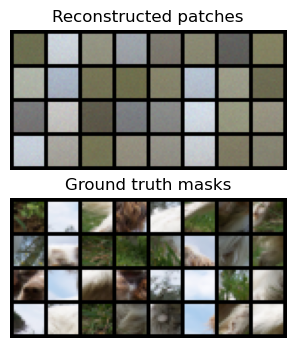

Epoch 1 Epoch 1 - Loss: 0.7882137747312133 - Time: 162.82363295555115


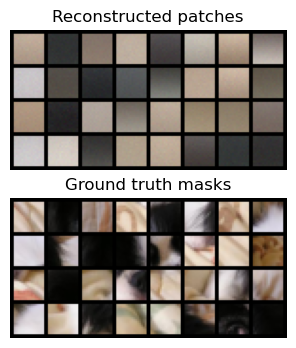

Epoch 2 Epoch 2 - Loss: 0.701415152373639 - Time: 162.88415551185608


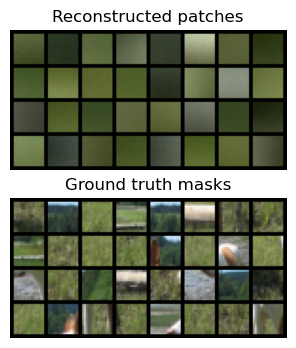

Epoch 3 Epoch 3 - Loss: 0.6482688159766522 - Time: 163.08873414993286


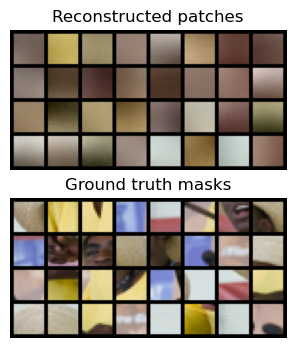

Epoch 4 Epoch 4 - Loss: 0.6149301188574596 - Time: 163.0661380290985


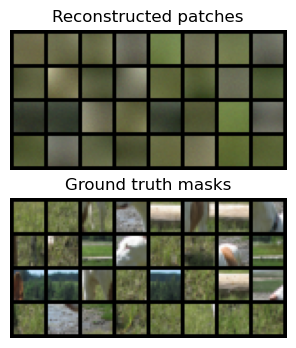

Epoch 5 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5 - Loss: 0.5922949328933927 - Time: 163.0627887248993


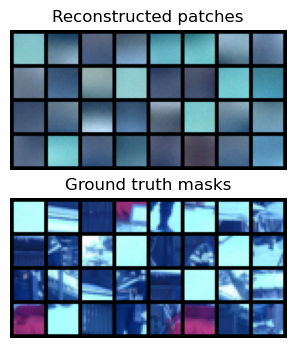

Epoch 6 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6 - Loss: 0.5750142854469066 - Time: 163.06068444252014


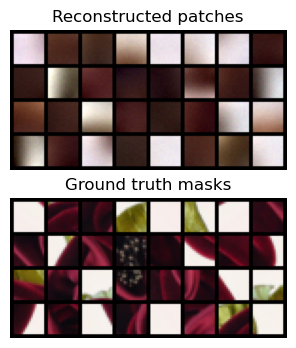

Epoch 7 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7 - Loss: 0.5599195128306746 - Time: 163.030903339386


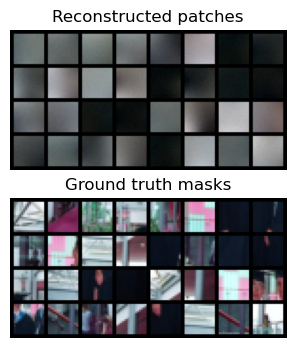

Epoch 8 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8 - Loss: 0.5471500702710315 - Time: 163.06137371063232


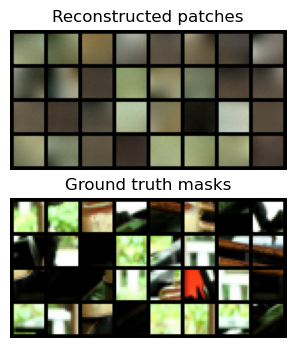

Epoch 9 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9 - Loss: 0.5369900076396086 - Time: 163.04239583015442


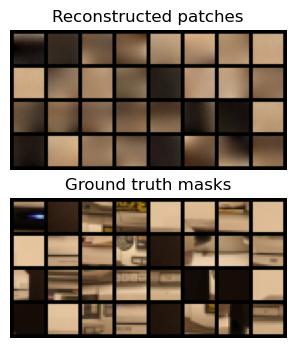

Epoch 10 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10 - Loss: 0.5261873872527345 - Time: 163.03782558441162


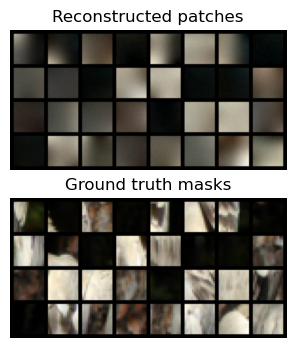

Epoch 11 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11 - Loss: 0.5161184690130706 - Time: 163.12351441383362


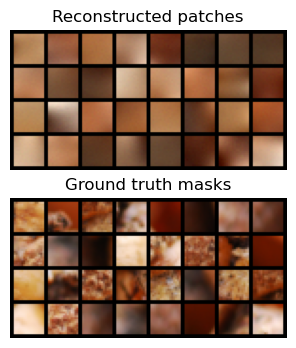

Epoch 12 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12 - Loss: 0.5080030681988732 - Time: 163.0546293258667


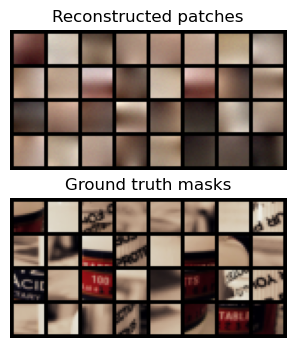

Epoch 13 Epoch 13 - Loss: 0.5016559562645853 - Time: 163.0675232410431


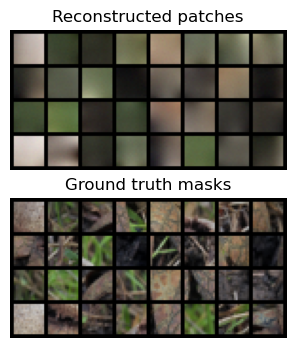

Epoch 14 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14 - Loss: 0.4929944097318433 - Time: 163.02771663665771


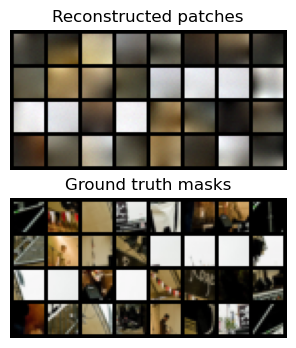

Epoch 15 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15 - Loss: 0.48752360084009444 - Time: 163.1663875579834


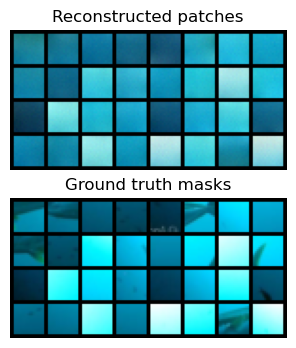

Epoch 16 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16 - Loss: 0.47966544461351907 - Time: 163.1605508327484


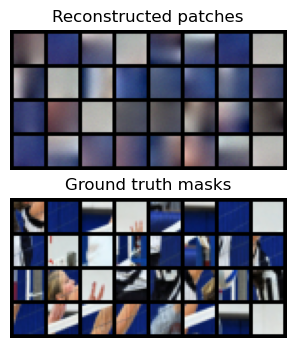

Epoch 17 Epoch 17 - Loss: 0.47398044829341496 - Time: 163.08223342895508


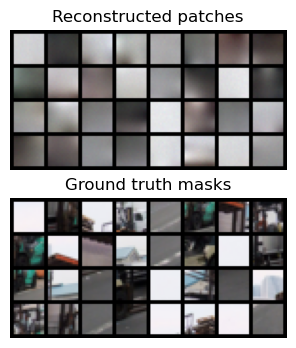

Epoch 18 Epoch 18 - Loss: 0.4682839324443855 - Time: 163.1130027770996


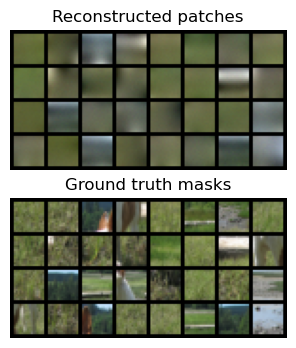

Epoch 19 Epoch 19 - Loss: 0.46237706913697446 - Time: 163.13340997695923


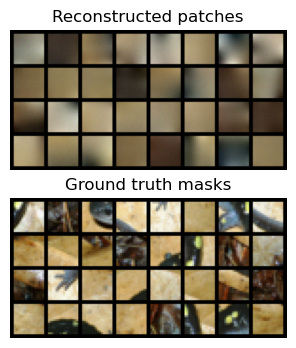

Epoch 20 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20 - Loss: 0.4589918065731498 - Time: 163.18678045272827


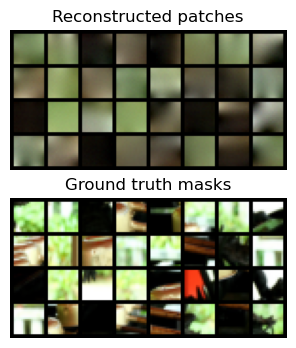

Epoch 21 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21 - Loss: 0.45321033319289034 - Time: 163.20884346961975


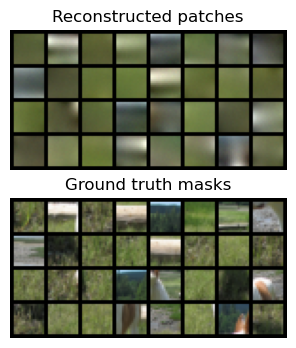

Epoch 22 Epoch 22 - Loss: 0.448725304227661 - Time: 163.15786480903625


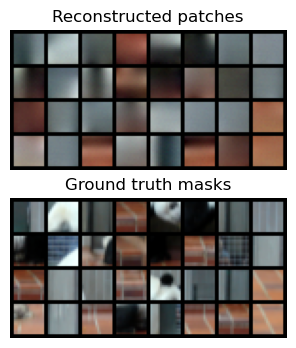

Epoch 23 Epoch 23 - Loss: 0.44269832845946605 - Time: 163.18083834648132


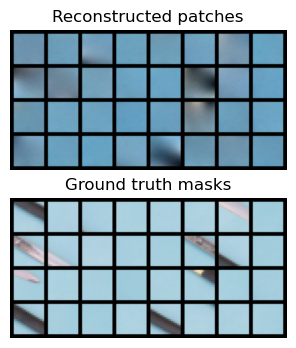

Epoch 24 Epoch 24 - Loss: 0.43914025949991564 - Time: 163.25562167167664


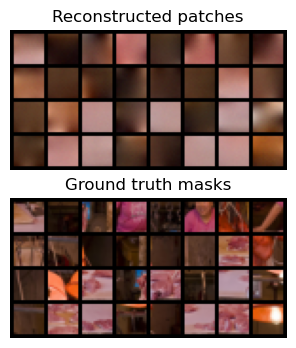

Epoch 25 Epoch 25 - Loss: 0.4348348423584618 - Time: 163.2211058139801


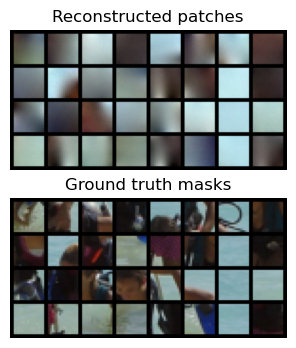

Epoch 26 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26 - Loss: 0.43003887797451834 - Time: 163.1784484386444


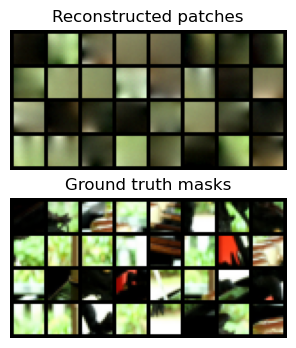

Epoch 27 Epoch 27 - Loss: 0.42621071031317115 - Time: 163.21820783615112


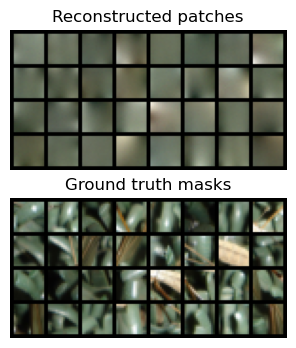

Epoch 28 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28 - Loss: 0.42349464298141276 - Time: 163.21227931976318


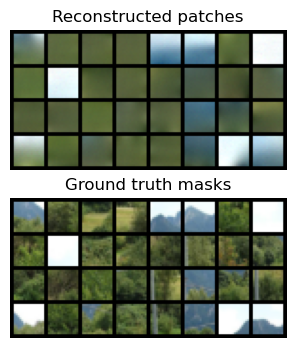

Epoch 29 Epoch 29 - Loss: 0.42013966326009144 - Time: 163.13742542266846


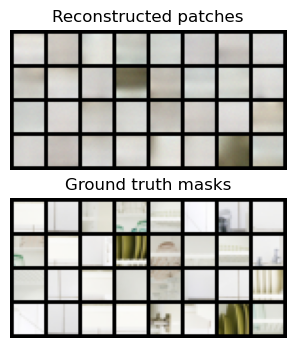

Epoch 30 Epoch 30 - Loss: 0.41735640629618004 - Time: 163.18014430999756


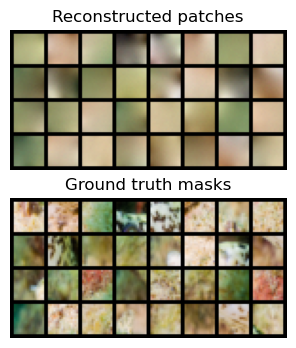

Epoch 31 Epoch 31 - Loss: 0.4119201916777952 - Time: 163.21486639976501


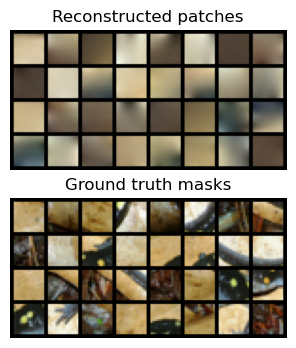

Epoch 32 Epoch 32 - Loss: 0.40987812901254406 - Time: 163.200777053833


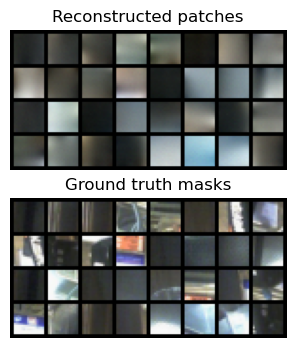

Epoch 33 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33 - Loss: 0.40634340610863134 - Time: 163.22699904441833


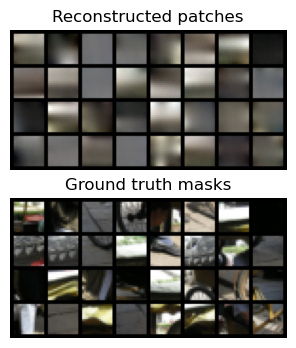

Epoch 34 Epoch 34 - Loss: 0.40411697154526005 - Time: 163.14702725410461


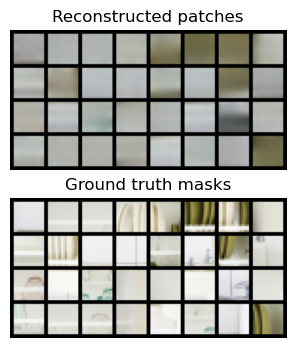

Epoch 35 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35 - Loss: 0.4015130610205233 - Time: 163.2031762599945


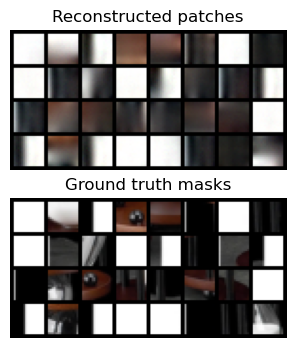

Epoch 36 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36 - Loss: 0.3970380821688609 - Time: 163.14234042167664


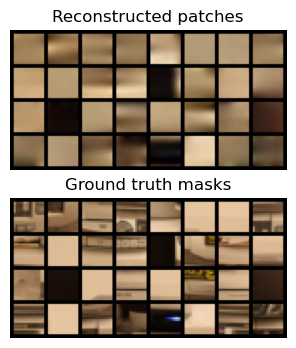

Epoch 37 Epoch 37 - Loss: 0.39539707617156883 - Time: 163.14275288581848


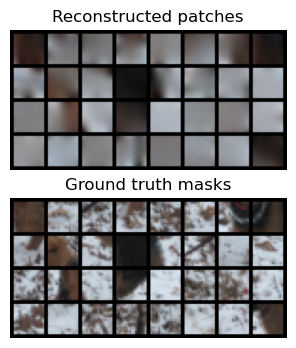

Epoch 38 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38 - Loss: 0.3927591114982285 - Time: 163.12241005897522


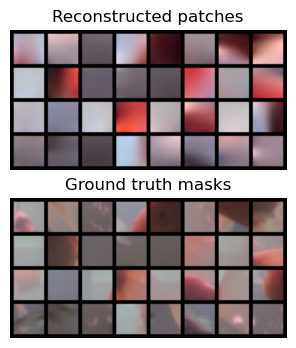

Epoch 39 Epoch 39 - Loss: 0.3896647364493798 - Time: 163.16100144386292


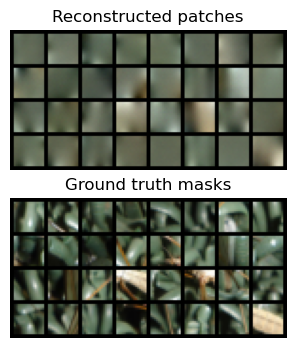

Epoch 40 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40 - Loss: 0.3873536772602661 - Time: 163.13758945465088


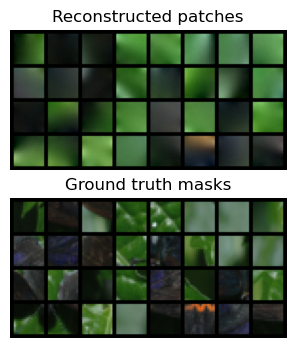

Epoch 41 

KeyboardInterrupt: 

In [4]:
model = ViT(
    image_size = 128,
    patch_size = 16,
    num_classes = 2,
    dim = 768,
    depth = 12,
    heads = 12,
    mlp_dim = 3072,
).to(device)

# Print number of parameters
print('Number of parameters:', sum(p.numel() for p in model.parameters()))

mim = SimMIM(
    encoder = model,
    masking_ratio = 0.5  # they found 50% to yield the best results
).to(device)
optimizer = optim.AdamW(
		params=mim.parameters(),
		lr=5e-5,
		weight_decay=5e-2
)


def display_reconstructions(testloader, mim):
    """Display 8 reconstructed patches and their corresponding ground truth patches."""
    test_images, test_targets = next(iter(testloader))
    test_images = test_images.to(device)
    # Evaluate model on test image
    test_loss, test_pred, test_masks = mim(test_images)

    # Plot an array of 8 masked patches reconstructed
    fig, axs = plt.subplots(2, 1, figsize=(20, 4))

    patch_size = 16

    plot_idx = torch.randint(0, test_images.size(0), (1,))
    pred_patches = test_pred[plot_idx].view(-1, patch_size, patch_size, 3).to(device)
    mask_patches = test_masks[plot_idx].view(-1, patch_size, patch_size, 3).to(device)

    # Unnormalize
    pred_patches = pred_patches * IMAGENET_DEFAULT_STD.to(device) + IMAGENET_DEFAULT_MEAN.to(device)
    mask_patches = mask_patches * IMAGENET_DEFAULT_STD.to(device) + IMAGENET_DEFAULT_MEAN.to(device)

    # Make grid for plotting
    test_patches = torchvision.utils.make_grid(pred_patches.permute(0, 3, 1, 2), nrow=8)
    test_masks = torchvision.utils.make_grid(mask_patches.permute(0, 3, 1, 2), nrow=8)

    # Plot the reconstructed patches
    axs[0].imshow(test_patches.permute(1, 2, 0).detach().cpu())
    axs[0].set_title('Reconstructed patches')
    axs[0].axis('off')

    # Plot the ground truth masks
    axs[1].imshow(test_masks.permute(1, 2, 0).detach().cpu())
    axs[1].set_title('Ground truth masks')
    axs[1].axis('off')

    plt.show()
    # plt.savefig('reconstructed_patches.png')


# display_reconstructions(testloader, mim)

n_epochs = 1000
for i in range(n_epochs):
    j = 0
    running_loss = 0.0
    epoch_start = time.time()
    print(f'Epoch {i}', end=' ')
    for images, _ in trainloader:
        # print(f'Epoch {i} | Batch {j}')
        j += 1

        images = images.to(device)
        loss, pred, masks = mim(images)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    # display_reconstructions(testloader, mim)
    print(f'Epoch {i} - Loss: {running_loss / len(trainloader)} - Time: {time.time() - epoch_start}')

    display_reconstructions(testloader, mim)
    torch.save(mim.encoder.state_dict(), 'pretrained_encoder.pth')

# Save the encoder
torch.save(mim.encoder.state_dict(), 'pretrained_encoder.pth')